In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def kernal_pca(indep_X, n):
    kernel_pca_model = KernelPCA(n_components=n,kernel='rbf')
    fit1 = kernel_pca_model.fit(indep_X)
    kernel_pca_features = fit1.transform(indep_X)
    return kernel_pca_features
    
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
def cm_prediction(classifier, X_test):
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)    
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report 

    Accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred,zero_division=1)
    return classifier, Accuracy, report, X_test, y_test, cm

def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      
     
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         
    
    
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      


def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def kernel_pca_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['Kernel_PCA'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [12]:
dataset1=pd.read_csv("Wine.csv",index_col=None)

df2=dataset1

df2 = pd.get_dummies(df2, drop_first=True)

indep_X=df2.drop('Customer_Segment', 1)
dep_Y=df2['Customer_Segment']

In [13]:
kernel_pca_result = kernal_pca(indep_X, 10)

acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

In [14]:
X_train, X_test, y_train, y_test=split_scalar(kernel_pca_result,dep_Y)   
    
        
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    


In [7]:
result=kernel_pca_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result#2

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
Kernel_PCA,0.444444,0.488889,0.488889,0.377778,0.4,0.533333,0.577778


In [15]:
result=kernel_pca_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result#10

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
Kernel_PCA,0.555556,0.511111,0.511111,0.4,0.288889,0.511111,0.577778


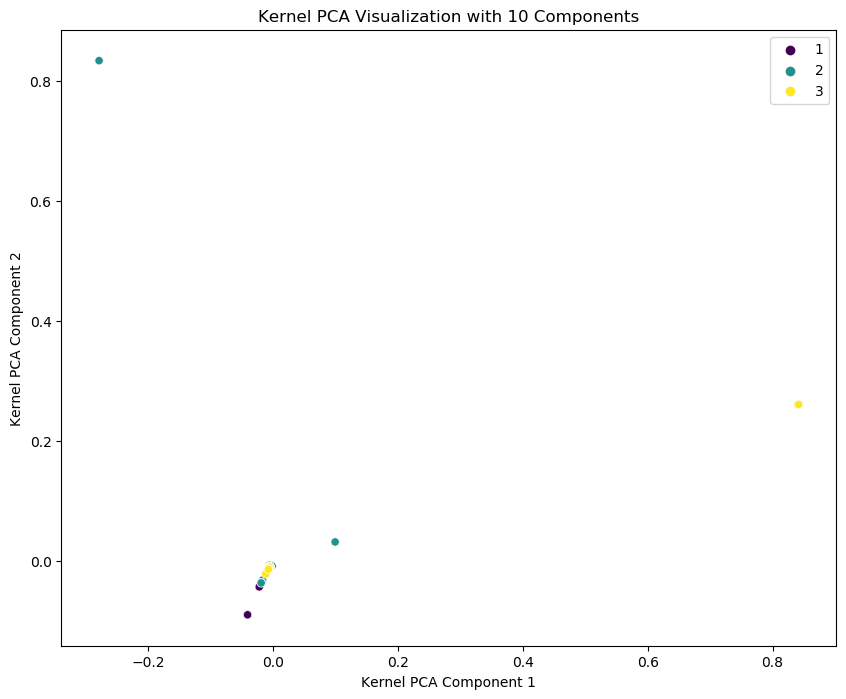

In [16]:


# Create a DataFrame for visualization
kpca_df = pd.DataFrame(data=kernel_pca_result, columns=[f'Component_{i}' for i in range(1, 11)])
kpca_df['Customer_Segment'] = dep_Y

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component_1', y='Component_2', hue='Customer_Segment', data=kpca_df, palette='viridis')
plt.title('Kernel PCA Visualization with 10 Components')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.legend()
plt.show()